   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


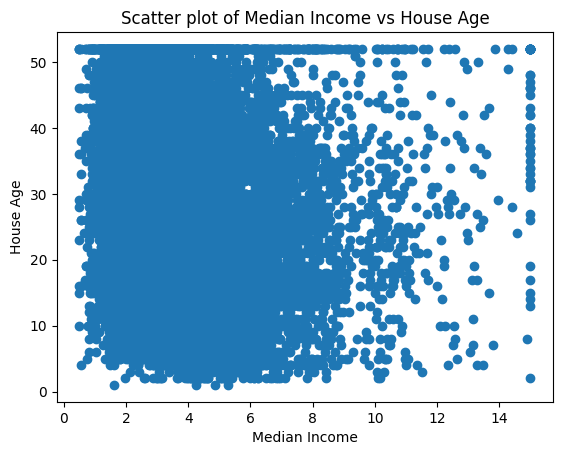

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [34]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

# Load the California housing dataset
california = fetch_california_housing()

# Create a DataFrame
file = pd.DataFrame(california.data, columns=california.feature_names)

# Display the first few rows to understand the structure of the data
print(file.head())

# Example: Scatter plot of 'MedInc' (median income) vs 'HouseAge'
plt.scatter(file['MedInc'], file['HouseAge'])
plt.xlabel('Median Income')
plt.ylabel('House Age')
plt.title('Scatter plot of Median Income vs House Age')
plt.show()
print(file.describe())

In [35]:
import numpy as np

# Select the 'MedInc' column (median income) for outlier detection
feature = 'MedInc'
data = file[feature]

# Calculate the Z-scores for the 'MedInc' column
mean = np.mean(data)
std_dev = np.std(data)
z_scores = (data - mean) / std_dev

# Set a threshold for outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3
outliers = data[np.abs(z_scores) > threshold]

# Identify and count the number of outliers
print(f"Number of outliers in '{feature}' based on Z-score threshold of {threshold}: {len(outliers)}")
print(outliers)
file_cleaned = file[np.abs(z_scores) <= threshold]
print(f"Dataset size after removing outliers: {file_cleaned.shape}")


Number of outliers in 'MedInc' based on Z-score threshold of 3: 345
131      11.6017
409      10.0825
510      11.8603
511      13.4990
512      12.2138
          ...   
20376    10.2614
20380    10.1597
20389    10.0595
20426    10.0472
20436    12.5420
Name: MedInc, Length: 345, dtype: float64
Dataset size after removing outliers: (20295, 8)


Original dataset size: (20640, 8)
Dataset size after removing outliers: (19959, 8)


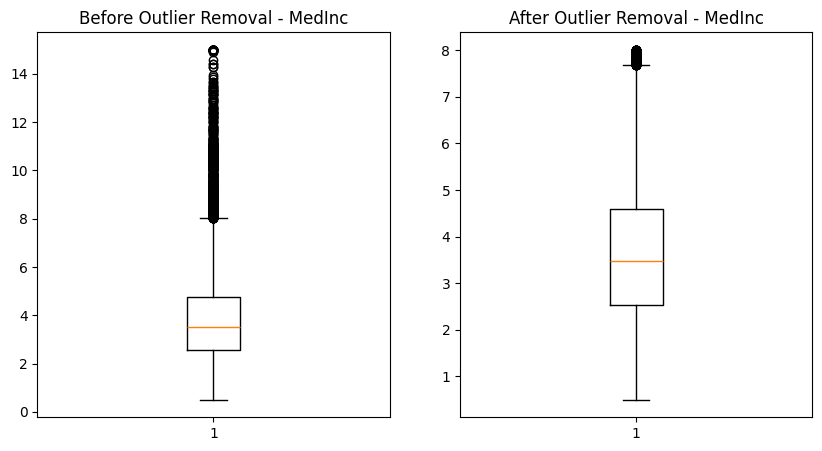

Before outlier removal:
count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

After outlier removal:
count    19959.000000
mean         3.657296
std          1.488482
min          0.499900
25%          2.536900
50%          3.469800
75%          4.593800
max          8.011300
Name: MedInc, dtype: float64


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california = fetch_california_housing()
file = pd.DataFrame(california.data, columns=california.feature_names)

feature = 'MedInc'
Q1 = file[feature].quantile(0.25)
Q3 = file[feature].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = file[(file[feature] < lower_bound) | (file[feature] > upper_bound)]


file_cleaned = file[(file[feature] >= lower_bound) & (file[feature] <= upper_bound)]

print(f"Original dataset size: {file.shape}")
print(f"Dataset size after removing outliers: {file_cleaned.shape}")

# Visualization: Boxplot before and after removing outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(file[feature])
plt.title(f'Before Outlier Removal - {feature}')

plt.subplot(1, 2, 2)
plt.boxplot(file_cleaned[feature])
plt.title(f'After Outlier Removal - {feature}')

plt.show()

# Statistical summary comparison
print("Before outlier removal:")
print(file[feature].describe())

print("\nAfter outlier removal:")
print(file_cleaned[feature].describe())


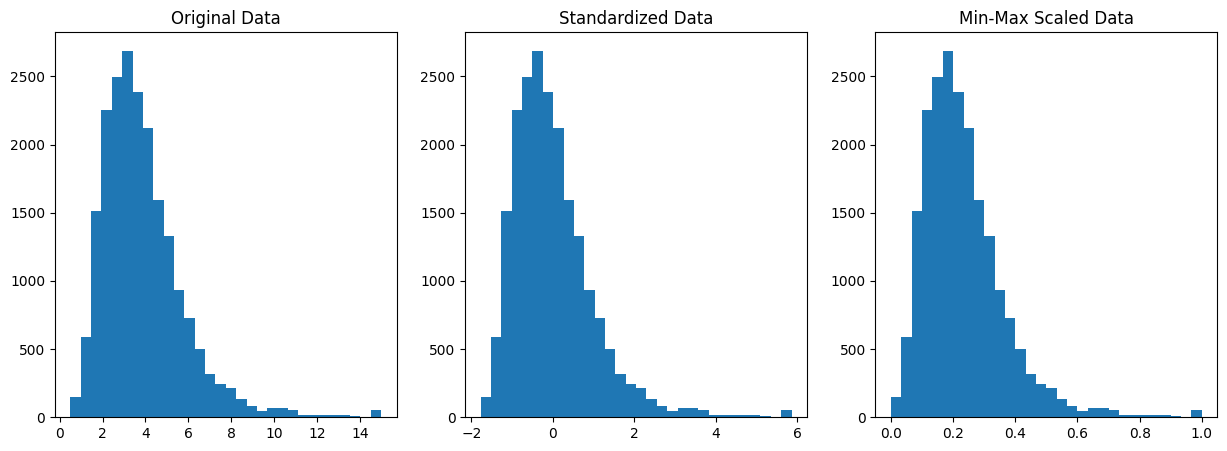

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the California housing dataset
california = fetch_california_housing()

# Create a DataFrame
file = pd.DataFrame(california.data, columns=california.feature_names)

# Standardize the 'MedInc' feature
scaler = StandardScaler()
file['MedInc_standardized'] = scaler.fit_transform(file[['MedInc']])

# Min-Max Scale the 'MedInc' feature
min_max_scaler = MinMaxScaler()
file['MedInc_scaled'] = min_max_scaler.fit_transform(file[['MedInc']])

# Visualize Original, Standardized, and Scaled Data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(file['MedInc'], bins=30)
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.hist(file['MedInc_standardized'], bins=30)
plt.title('Standardized Data')

plt.subplot(1, 3, 3)
plt.hist(file['MedInc_scaled'], bins=30)
plt.title('Min-Max Scaled Data')

plt.show()
